# SNS injection painting

In [1]:
import sys
import importlib
import os
from os.path import join

import numpy as np
import pandas as pd
from matplotlib import animation
from matplotlib import pyplot as plt
from matplotlib import patches
from matplotlib.lines import Line2D
from tqdm import tqdm
from tqdm import trange
import proplot as pplt 
import seaborn as sns

sys.path.append('..')
from tools import animation as myanim
from tools import beam_analysis as ba
from tools import plotting as myplt
from tools import utils

## Settings

In [2]:
plt.rcParams['animation.html'] = 'jshtml'
plt.rcParams['axes.grid'] = False
pplt.rc['cmap.discrete'] = False
pplt.rc['cmap.sequential'] = 'mono_r'
plt.rcParams['figure.facecolor'] = 'white'
pplt.rc['grid.alpha'] = 0.02
plt.rcParams['savefig.dpi'] = 'figure'
lineplot_kws = dict(marker=None, legend=False)
format_kws = dict(ygrid=True, xgrid=False)
savefig_kws = dict(dpi=300)

In [3]:
folder = '_output/data/'
location = 'injection point' # {'injection point', 'rtbt entrance'}

In [4]:
utils.delete_files_not_folders('_output/figures/')

## Injection region

### Closed orbit 

In [5]:
inj_region_coords_t0 = np.load(join(folder, 'inj_region_coords_t0.npy'))
inj_region_coords_t1 = np.load(join(folder, 'inj_region_coords_t1.npy'))
inj_region_positions_t0 = np.load(join(folder, 'inj_region_positions_t0.npy'))
inj_region_positions_t1 = np.load(join(folder, 'inj_region_positions_t1.npy'))
inj_region_coords_t0 *= 1000. # convert to mm-mrad
inj_region_coords_t1 *= 1000. # convert to mm-mrad

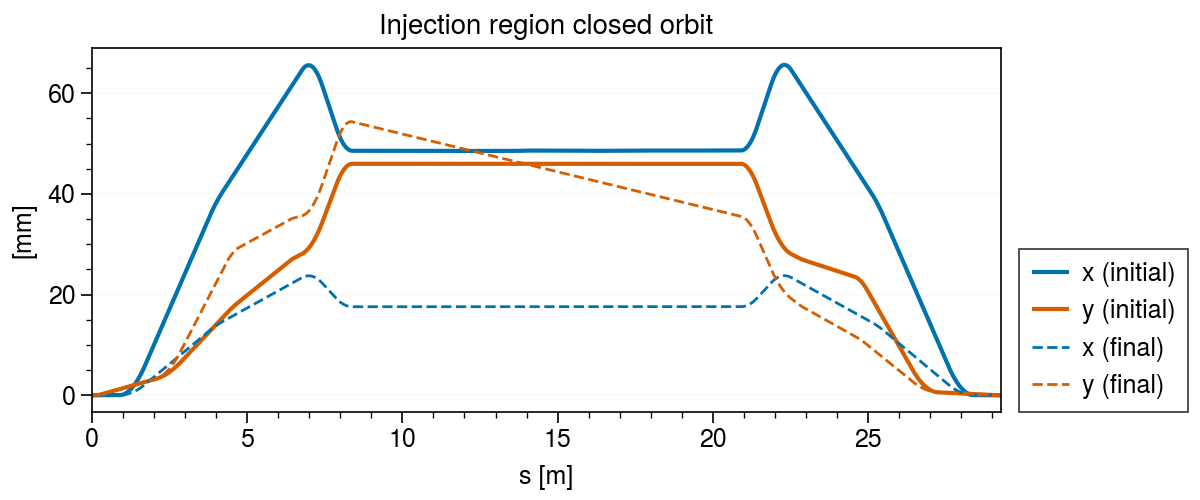

In [6]:
fig, ax = pplt.subplots(figsize=(6, 2.5))
ax.plot(inj_region_positions_t0, inj_region_coords_t0[:, 0], label='x (initial)')
ax.plot(inj_region_positions_t0, inj_region_coords_t0[:, 2], label='y (initial)')
ax.format(cycle='colorblind')
ax.plot(inj_region_positions_t1, inj_region_coords_t1[:, 0], ls='--', lw=1, label='x (final)')
ax.plot(inj_region_positions_t1, inj_region_coords_t1[:, 2], ls='--', lw=1, label='y (final)')
ax.format(title='Injection region closed orbit')
ax.legend(ncols=1, loc=(1.02, 0), handlelength=1.5);
ax.format(xlabel='s [m]', ylabel='[mm]', **format_kws) 
plt.savefig('_output/figures/inj_region_closed_orbit.png', **savefig_kws)

### Kicker strengths

In [7]:
# def get_perveance(kin_energy, mass, line_density):
#     classical_proton_radius = 1.53469e-18 # m
#     gamma = 1 + (kin_energy / mass) # Lorentz factor
#     beta = np.sqrt(1 - (1 / gamma)**2) # velocity/speed_of_light
#     return (2 * classical_proton_radius * line_density) / (beta**2 * gamma**3)

# ring_length = 248.0
# zlim = (135.0 / 360.0) * ring_length
# zmin, zmax = -zlim, zlim
# bunch_length = zmax - zmin

# # Production beam
# kin_energy = 1.0 # [GeV]
# mass = 0.93827231 # [kg]
# intensity = 1.5e14
# Q = get_perveance(kin_energy, mass, intensity / bunch_length)
# xmax = ymax = 26.0
# area = xmax * ymax
# print('Q = {}'.format(Q))
# density_production = Q / area
# print('Q / area = {}'.format(density_production))

# # SCBD
# kin_energy = 1.0 # [GeV]
# mass = 0.93827231 # [kg]
# max_intensity = 1.5e14
# max_n_turns = 1000.
# xmax = ymax = 26.0
# area = xmax * ymax
# densities = []
# turns = np.linspace(1, max_n_turns, 1000)
# for t in turns:
#     tau = t / max_n_turns
#     intensity = max_intensity * tau
#     Q = get_perveance(kin_energy, mass, intensity / bunch_length)
#     densities.append(Q / area)
# densities = np.array(densities)
    
# fig, ax = pplt.subplots()
# ax.plot(turns, densities, color='black');
# ymin, ymax = ax.get_ylim()
# alpha = 0.15
# ax.fill_between(turns, 0., density_production, color='green', alpha=alpha)
# ax.fill_between(turns, density_production, ymax, color='red', alpha=alpha)
# ax.format(grid=True, ylim=(0, ax.get_ylim()[1]),
#           xlabel='# turns to reach full beam size', ylabel=r'Q / area [mm$^{-2}$]')
# plt.savefig('_output/figures/perveance_scaling_{}_{}.png'.format(kin_energy, xmax))

In [8]:
kicker_angles_t0 = np.loadtxt(folder + 'kicker_angles_t0.dat')
kicker_angles_t1 = np.loadtxt(folder + 'kicker_angles_t1.dat')
kicker_names = ['ikickh_a10', 'ikickv_a10', 'ikickh_a11', 'ikickv_a11',
                'ikickv_a12', 'ikickh_a12', 'ikickv_a13', 'ikickh_a13']

In [9]:
def waveform(t, k0, k1):
    return k0 - (k0 - k1)*np.sqrt(t)

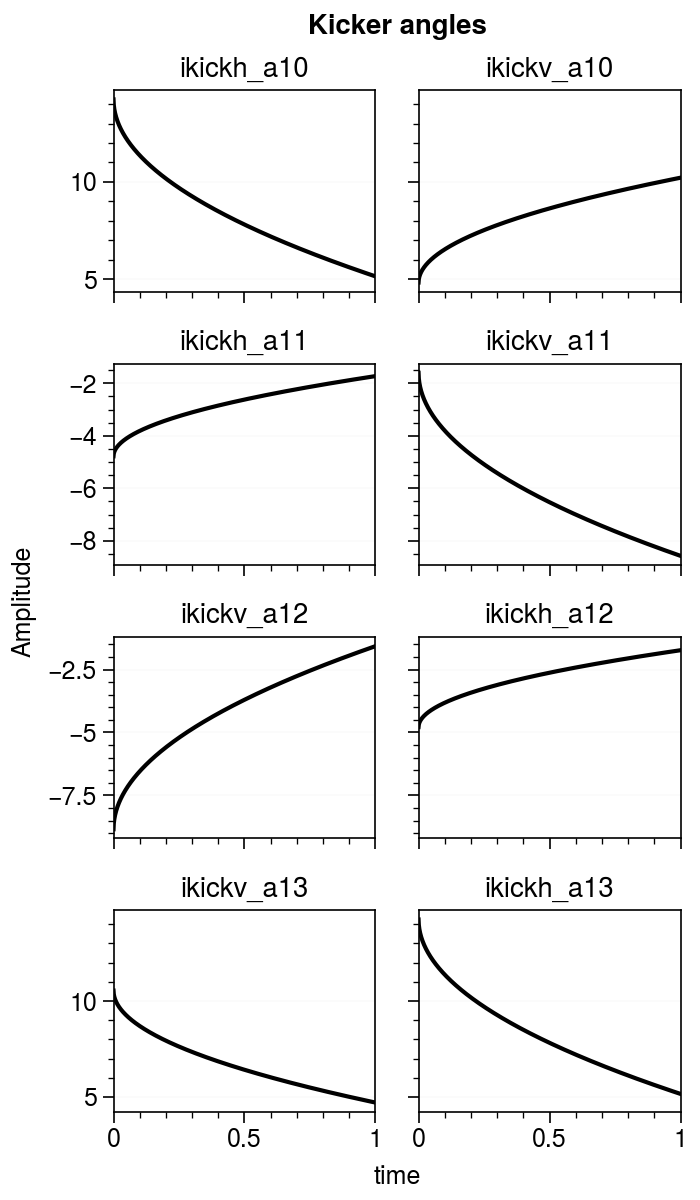

In [10]:
t = np.linspace(0, 1, 1000)

fig, axes = pplt.subplots(nrows=4, ncols=2, figsize=(3.5, 6))
for k0, k1, name, ax in zip(kicker_angles_t0, kicker_angles_t1, kicker_names, axes):
    ax.plot(t, 1000 * waveform(t, k0, k1), c='k')
    ax.format(title=name)
axes.format(ylabel='Amplitude', suptitle='Kicker angles', xlabel='time', **format_kws)
plt.savefig('_output/figures/kicker_angles.png', **savefig_kws)

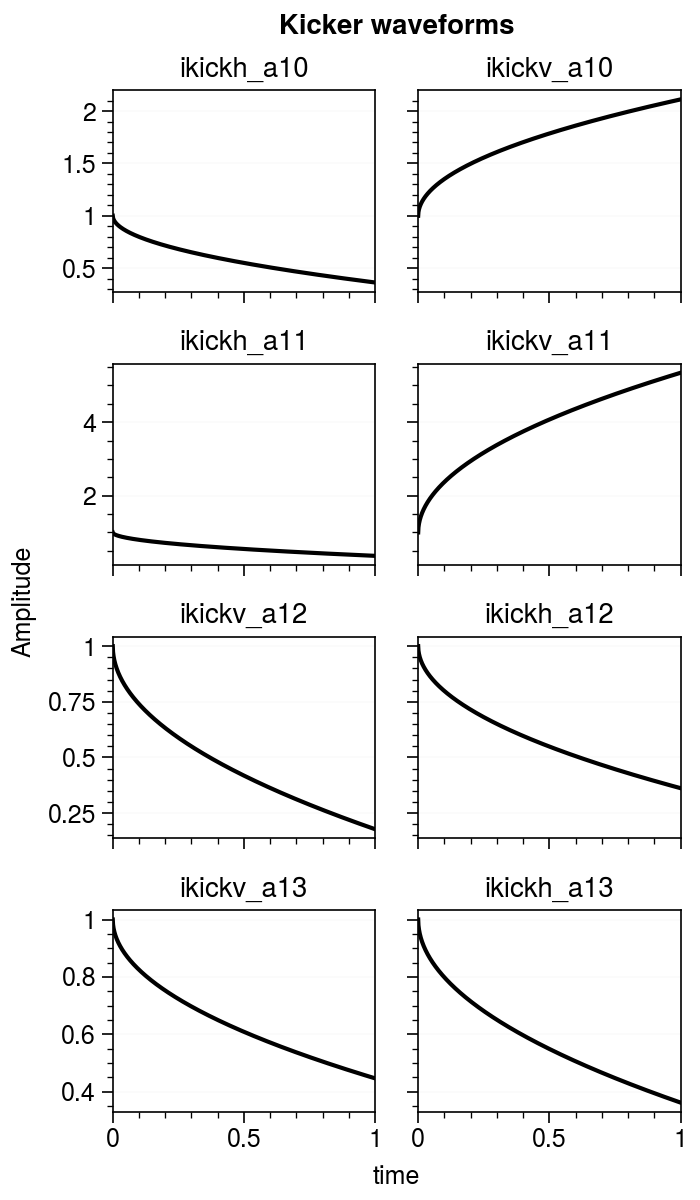

In [11]:
fig, axes = pplt.subplots(nrows=4, ncols=2, figsize=(3.5, 6))
for k0, k1, name, ax in zip(kicker_angles_t0, kicker_angles_t1, kicker_names, axes):
    ax.plot(t, waveform(t, 1.0, k1/k0), c='k')
    ax.format(title=name)
axes.format(ylabel='Amplitude', suptitle='Kicker waveforms', xlabel='time', **format_kws)
plt.savefig('_output/figures/kicker_waveforms.png', **savefig_kws)

### Element positions 

In [12]:
def lens(pos, width, height, foc=True, **kws):
    if foc:
        coords = [
            (pos - 0.5 * width, -0.5 * height),
            (pos + 0.5 * width, -0.5 * height),
            (pos - 0.5 * width, +0.5 * height),
            (pos + 0.5 * width, +0.5 * height),
        ]
    else:
        coords = [
            (pos - 0.5 * width, 0.0),
            (pos, -0.5 * height),
            (pos + 0.5 * width, 0.0),
            (pos, +0.5 * height),
        ]
    return patches.Polygon(coords, **kws)

In [13]:
def is_quad(name):
    return name.startswith('q') and 'sc' not in name

def is_kicker(name):
    return name.startswith('ikick')

def is_corrector(name):
    return 'dchv' in name or 'dmcv' in name

def is_foil(name):
    return name == 'inj_mid'
    
def get_number(name):
    for i, character in enumerate(name):
        if character.isnumeric():
            return int(name[i:])

In [26]:
colors = pplt.Cycle('538').by_key()['color']

dmcv_a09
dchv_a10
dchv_a13
dmcv_b01


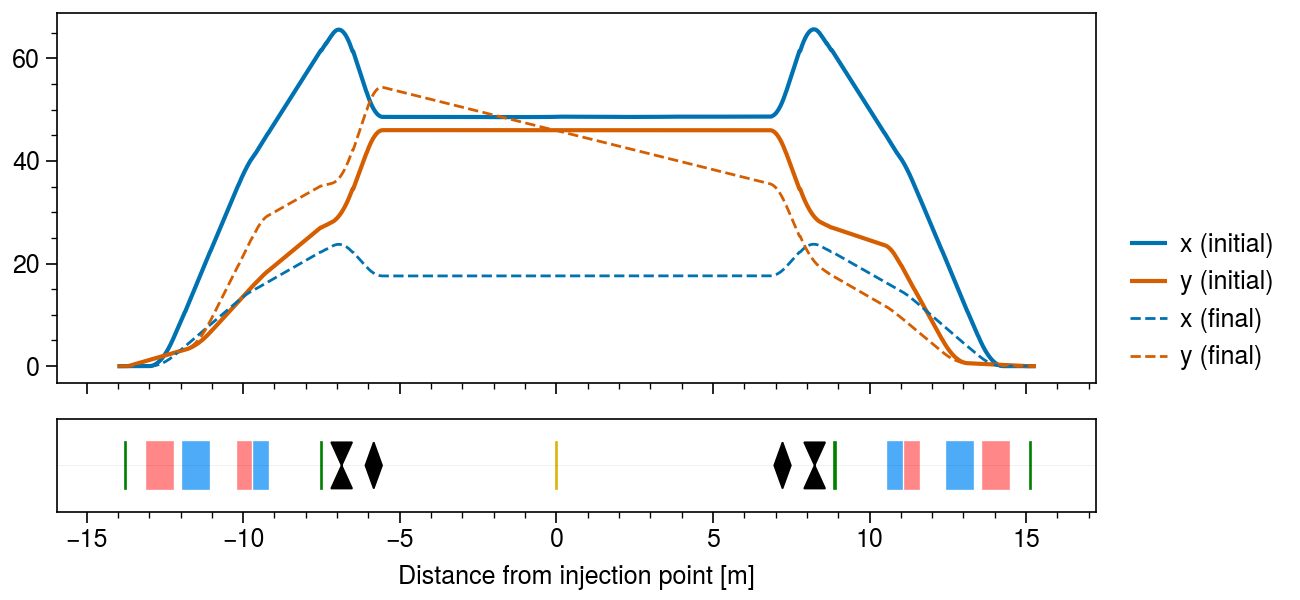

In [63]:
file = open('_output/data/injection_region_node_positions.txt', 'r')
names, positions = [], []
widths = []
for line in file:
    name, start, stop = line.rstrip().split(' ')
    names.append(name)
    start = float(start)
    stop = float(stop)
    positions.append(0.5 * (start + stop))
    widths.append(stop - start)
file.close()
    
start = names.index('inj_start')
stop = names.index('inj_end')
names = names[start:] + names[:stop]
positions = list(np.subtract(positions[start:], positions[-1])) + positions[:stop]
widths = widths[start:] + widths[:stop]

fig, axes = pplt.subplots(nrows=2, 
                          figsize=(6.5, 3),
                          height_ratios=(1.0, 0.25))
pad = 2.0
axes.format(xlim=(min(positions) - pad, max(positions) + pad), xlabel='Distance from injection point [m]')

# Lattice elements
height = 0.4
ytextpos = 0.28
ax = axes[1]
colors = {
    'quad': 'black',
    'hkicker': 'red4',
    'vkicker': 'blue4',
    'foil': 'gold',
    'vcorrector': 'green',
}
for position, name, width in zip(positions, names, widths):
    if is_quad(name):
        focusing = 'h' in name
        patch = lens(position, width, height, focusing, color=colors['quad'])        
    elif is_kicker(name): 
        if 'h' in name:
            color = colors['hkicker']
        else:
            color = colors['vkicker']
        patch = patches.Rectangle((position - 0.5 * width, -0.5 * height), width, height, color=color)
    elif is_corrector(name):
        print(name)
        color = colors['vcorrector']            
        width = 0.04
        patch = patches.Rectangle((position - 0.5 * width, -0.5 * height), width, height, color=color)
    elif is_foil(name):
        color = colors['foil']
        width = 0.02
        patch = patches.Rectangle((position - 0.5 * width, -0.5 * height), width, height, color=color)
    else:
        continue
    ax.add_patch(patch)
ax.axhline(0., color='black', alpha=0.1, lw=0.2)
ax.format(ylim=(-height, height), yticks=[])

# Closed orbit.
ax = axes[0]
_pos = np.linspace(positions[0], positions[-1], len(inj_region_coords_t0))
ax.plot(_pos, inj_region_coords_t0[:, 0], label='x (initial)')
ax.plot(_pos, inj_region_coords_t0[:, 2], label='y (initial)')
ax.format(cycle='colorblind')
ax.plot(_pos, inj_region_coords_t1[:, 0], ls='--', lw=1, label='x (final)')
ax.plot(_pos, inj_region_coords_t1[:, 2], ls='--', lw=1, label='y (final)')
ax.legend(ncols=1, loc=(1.02, 0), handlelength=1.5, framealpha=0)
# plt.savefig('_output/figures/inj_region_elements.png', **savefig_kws)
plt.show()

## Beam statistics

In [ ]:
if location == 'rtbt entrance':
    suffix = 'rtbt'
elif location == 'injection point':
    suffix = 'inj'
else:
    raise ValueError('Invalid location.')
    
turns = np.loadtxt(join(folder, 'turns_stored_{}.dat'.format(suffix)))
turns = turns.astype(int)
print(turns)

In [ ]:
coords = utils.load_stacked_arrays(join(folder, 'coords_{}.npz'.format(suffix)))
for i in trange(len(coords)):
    coords[i][:, 5] *= 1000. # convert dE to [MeV]

In [ ]:
stats = ba.BeamStats()
stats.read_coords(coords)

In [ ]:
fig, ax = pplt.subplots(figsize=(4, 3.0))
g1 = ax.plot(turns, stats.twiss2D.loc[:, 'eps_x'], **lineplot_kws)
g2 = ax.plot(turns, stats.twiss2D.loc[:, 'eps_y'], **lineplot_kws)
g3 = ax.plot(turns, stats.twiss4D.loc[:, 'eps_1'], **lineplot_kws)
g4 = ax.plot(turns, stats.twiss4D.loc[:, 'eps_2'], **lineplot_kws)
ax.legend([g1, g2, g3, g4], labels=[r'$\varepsilon_{}$'.format(v) for v in ['x', 'y', '1', '2']], 
          ncols=1, loc='upper left', framealpha=1.0)
ax.format(ylabel='[mm mrad]', xlabel='Turn number', ylim=(0., ax.get_ylim()[1]), **format_kws);
plt.savefig('_output/figures/emittances.png', **savefig_kws)

In [ ]:
fig, ax = pplt.subplots(figsize=(4.4, 2.5))
g1 = ax.plot(turns, stats.twiss2D.loc[:, 'eps_x'], **lineplot_kws)
g2 = ax.plot(turns, stats.twiss2D.loc[:, 'eps_y'], **lineplot_kws)
g3 = ax.plot(turns, stats.twiss4D.loc[:, 'eps_1'], **lineplot_kws)
g4 = ax.plot(turns, stats.twiss4D.loc[:, 'eps_2'], **lineplot_kws)
ax.legend([g1, g2, g3, g4], labels=[r'$\varepsilon_{}$'.format(v) for v in ['x', 'y', '1', '2']], 
          ncols=1, loc='right', framealpha=.0)
ax.format(ylabel='[mm mrad]', xlabel='Turn number', ylim=(0., ax.get_ylim()[1]), **format_kws);
plt.savefig('_output/figures/emittances2.png', **savefig_kws)

In [ ]:
fig, ax = pplt.subplots(figsize=(4, 3.0))
g1 = ax.plot(turns, (stats.twiss2D['eps_x'] * stats.twiss2D['eps_y']), color='red', **lineplot_kws)
g2 = ax.plot(turns, (stats.twiss4D['eps_1'] * stats.twiss4D['eps_2']), color='blue', **lineplot_kws)
ax.legend([g1, g2], labels=[r'$\varepsilon_x\varepsilon_y$', r'$\varepsilon_1\varepsilon_2$'],
          ncols=1, loc='upper left')
ax.format(ylabel='[mm mrad]', xlabel='Turn number', ylim=(0., ax.get_ylim()[1]), **format_kws);
plt.savefig('_output/figures/emittances4D.png', **savefig_kws)

In [ ]:
fig, ax = pplt.subplots(figsize=(3.5, 2.5))
C = np.sqrt((stats.twiss2D['eps_x'] * stats.twiss2D['eps_y']) / (stats.twiss4D['eps_1'] * stats.twiss4D['eps_2']))
ax.plot(turns, C, c='black', **lineplot_kws)
ax.format(xlabel='Turn number', 
          title=r'C = $\sqrt{\frac{\varepsilon_x\varepsilon_y}{\varepsilon_1\varepsilon_2}}$', 
          **format_kws)
plt.savefig('_output/figures/coupling_factor.png', **savefig_kws)

In [ ]:
fig, ax = pplt.subplots(figsize=(4.0, 2.25))
h1 = ax.plot(turns, stats.twiss2D['beta_x'])
h2 = ax.plot(turns, stats.twiss2D['beta_y'])
legend_kws = dict(loc='right', ncol=1, framealpha=0.)
ax.legend(handles=[h1, h2], labels=[r'$\beta_x$', r'$\beta_y$'], **legend_kws)
ax.format(xlabel='Turn number', ylabel='[m/rad]', **format_kws)
plt.savefig('_output/figures/beta.png', **savefig_kws)

In [ ]:
fig, ax = pplt.subplots(figsize=(4.0, 2.25))
h1 = ax.plot(turns, stats.twiss2D['alpha_x'])
h2 = ax.plot(turns, stats.twiss2D['alpha_y'])
legend_kws = dict(loc='right', ncol=1, framealpha=0.)
ax.legend(handles=[h1, h2], labels=[r'$\alpha_x$', r'$\alpha_y$'], **legend_kws)
ax.format(xlabel='Turn number', ylabel='[rad]')
plt.savefig('_output/figures/alpha.png', **savefig_kws)

In [ ]:
fig, axes = pplt.subplots(nrows=2, figsize=(3.5, 3.33), spany=False, aligny=True)
axes[0].plot(turns, stats.twiss4D['u'], color='black', **lineplot_kws)
axes[1].plot(turns, stats.twiss4D['nu'], color='black', **lineplot_kws)
axes[0].format(ylabel='u')
axes[1].format(ylabel=r'$\nu$', yformatter='deg')
axes.format(**format_kws)
plt.savefig('_output/figures/u_and_nu.png', **savefig_kws)

## Tunes 

In [ ]:
filenames = [
    'bunch_turn=100.dat',
    'bunch_turn=200.dat',
    'bunch_turn=300.dat', 
    'bunch_turn=400.dat'
]
for filename in filenames:
    df = ba.load_pybunch(os.path.join(folder, filename))
    
    numin, numax = 5.95, 6.20
    nu_limits = (numin, numax)
    
    fig, ax = pplt.subplots(figsize=(2.75, 2.75))
    nux = df['nux'].values
    nuy = df['nuy'].values
    nux[np.where(nux > 0.5)] -= 1.0
    nuy[np.where(nuy > 0.5)] -= 1.0
    nux += 6.0
    nuy += 6.0
    ax.hist2d(nux, nuy, bins=70, range=(nu_limits, nu_limits), cmap='dusk_r', discrete=False, colorbar=False)
    line_kws = dict(color='white', lw=0.3, alpha=0.5)
    ax.axvline(6.0, **line_kws)
    ax.axhline(6.0, **line_kws)
    ax.plot(ax.get_xlim(), ax.get_xlim(), **line_kws)
    ax.format(xlabel=r'$\nu_x$', ylabel=r'$\nu_y$', aspect=1.0)
    
    plt.savefig('_output/figures/tunes_{}.png'.format(filename), **savefig_kws)
    plt.show()

## TBT coordinates 

In [ ]:
foil_pos = (48.6, 46.0)
coords_foil_frame = []
for X in tqdm(coords):
    Y = np.copy(X)
    Y[:, 0] -= foil_pos[0]
    Y[:, 2] -= foil_pos[1]
    coords_foil_frame.append(Y)

In [ ]:
import importlib
importlib.reload(myplt);

In [ ]:
kind = 'hist'
bins = 'auto'
cmap = pplt.Colormap('mono', left=0.035)
hist_height_frac = 0.6
blur = 0.
thresh = 0.
log = False
autolim_kws = dict(sigma=4.0)

In [ ]:
frame = -1
diag_kws = dict(
    histtype='step',
    bins='auto',
)
plot_kws = dict(
    bins=bins,
    cmap=cmap,
)

In [ ]:
axes = myplt.corner(
    coords_foil_frame[frame][:, :4], 
    kind=kind, 
    log=log,
    hist_height_frac=hist_height_frac, blur=blur, thresh=thresh, 
    autolim_kws=autolim_kws, diag_kws=diag_kws, 
    **plot_kws
)
limits = [ax.get_xlim() for ax in axes[-1, :]]
plt.savefig('_output/figures/corner4D_turn{}.png'.format(turns[frame]), **savefig_kws)

In [ ]:
axes = myplt.corner(coords_foil_frame[frame], **plot_kws)
plt.close()
limits = [ax.get_xlim() for ax in axes[-1, :]]
limits[4] = (-248/2, 248/2)

axes = myplt.corner(
    coords_foil_frame[frame], 
    kind=kind, 
    limits=limits,
    log=log,
    hist_height_frac=hist_height_frac, blur=blur, thresh=thresh, 
    autolim_kws=autolim_kws, diag_kws=diag_kws, 
    **plot_kws
)
plt.savefig('_output/figures/corner6D_turn{}.png'.format(turns[frame]), **savefig_kws)

### Other plots

In [ ]:
n_bins = 150
projections = np.zeros((len(coords_foil_frame), 6, n_bins))
centers = np.zeros((6, n_bins))
for frame, X in enumerate(tqdm(coords_foil_frame)):
    for axis in range(6):
        projections[frame, axis, :], edges = np.histogram(X[:, axis], n_bins, limits[axis], density=False)
        centers[axis, :] = 0.5 * (edges[:-1] + edges[1:])

In [ ]:
fig, axes = pplt.subplots(ncols=6, figsize=(8.0, 2.2), spanx=False, alignx=True)
vmax = None
_thresh = 0.
xlabels = ["x [mm]", "x' [mrad]", "y [mm]", "y' [mrad]", "z [m]", "dE [MeV]"]
for i, ax in enumerate(axes):
    Z = projections[:, i]
    if _thresh is not None:
        Z = np.ma.masked_less_equal(Z, _thresh)
    ax.pcolormesh(centers[i], turns, Z, cmap=pplt.Colormap('mono', left=0.03), ec='none')
    ax.set_xlabel(xlabels[i])
axes.format(ylabel='Turn number')
plt.savefig('_output/figures/1Dproj.png', **savefig_kws)

In [ ]:
frames = list(range(len(coords)))
frames = frames[::50]
bins = 'auto'
log = False
blur = None
thresh = 0.
equal_bins = False
indices = [(0, 2), (0, 1), (2, 3), (0, 3), (2, 1), (1, 3)]

fig, axes = pplt.subplots(
    nrows=len(frames), ncols=6, figwidth=6.5, 
    space=0.,
    spanx=False, spany=False, sharex=False, sharey=False,
)
axes.format(
    xticks=[], yticks=[],
    xticklabels=[], yticklabels=[]
)   
for row in trange(axes.shape[0]):
    frame = frames[row]
    X = coords_foil_frame[frame]
    axes[row, 0].set_ylabel('Turn {}'.format(turns[frame]), fontsize='small')
    for col in range(axes.shape[1]):
        ax = axes[row, col]
        i, j = indices[col]       
        x = X[:, i]
        y = X[:, j]
        b = bins
        if row == 0:
            b = 125
        xedges = np.histogram_bin_edges(x, b, limits[i])
        yedges = np.histogram_bin_edges(y, b, limits[j])
        binsx = len(xedges) - 1
        binxy = len(yedges) - 1
        if equal_bins and bins == 'auto':
            binsx = binsy = max(binsx, binxy)
            xedges = np.histogram_bin_edges(x, binsx, limits[i])
            yedges = np.histogram_bin_edges(y, binsy, limits[j])
        Z, _, _ = np.histogram2d(x, y, [xedges, yedges])
        if log:
            Z = np.log10(1.0 + Z)
        if blur:
            from skimage import filters
            Z = filters.gaussian(Z, blur)
        if thresh is not None:
            Z = np.ma.masked_less_equal(Z, thresh)
        ax.pcolormesh(xedges, yedges, Z.T, ec='none', cmap=cmap)
        
for col in range(axes.shape[1]):
    i, j = indices[col]
    axes[:, col].format(xlim=limits[i], ylim=limits[j])
    int_to_str = {0:"x", 1:"x'", 2:"y", 3:"y'"}
    dimx = int_to_str[i]
    dimy = int_to_str[j]
    axes[0, col].set_title('{}-{}'.format(dimx, dimy))
    
plt.savefig('_output/figures/snapshots.png', **savefig_kws)
plt.show()

In [ ]:
# fig, axes = pplt.subplots(ncols=3, nrows=3, figsize=(5, 5), spanx=False, spany=False)

# for j in range(3):
#     for i in range(j):
#         axes[i, j].axis('off')
# myplt.despine(axes, ('top', 'right'))
# plot_kws = dict(lw=0, marker='.', ms=1, color='steelblue', markeredgecolor='none')
# lines = [[], [], []]
# for i in range(3):
#     for j in range(i + 1):
#         line, = axes[i, j].plot([], [], **plot_kws)
#         lines[i].append(line)
        
#         axes[i, j].format(xlim=limits[j], ylim=limits[i + 1])
#         kws = dict(color='black', alpha=0.1, lw=0.5, zorder=0)
#         axes[i, j].axvline(0.0, **kws)
#         axes[i, j].axhline(0.0, **kws)
# # plt.close()

# def update(turn):
#     turn *= 10
#     X = coords_foil_frame[turn]
#     for i in range(3):
#         for j in range(i + 1):
#             lines[i][j].set_data(X[:, j], X[:, i + 1])
#     for text in axes[0, 1].texts:
#         text.set_visible(False)
#     axes[0, 1].annotate('Turn = {}'.format(turn), xy=(0.4, 0.5), xycoords='axes fraction')
    
# #     for ax in axes:
# #         for patch in ax.patches:
# #             patch.set_visible(False)
#     Sigma = np.cov(X.T)
#     centers = np.mean(X, axis=0)
#     myplt.rms_ellipses(4 * Sigma, centers=centers, axes=axes, color='black', zorder=99)

# anim = animation.FuncAnimation(fig, update, frames=30)
# anim.save('_output/figures/cornertest.mp4', dpi=350)

In [ ]:
fps = 3
skip = 19
global_cmap_norm = False,
static_n_bins = 'final'
keep_last = True
text_fmt = 'Turn = {}'
text_vals = turns
anim_kws = dict()

In [ ]:
# importlib.reload(myanim)

In [ ]:
# for dims in [4, 6]:
#     anim = myanim.corner(
#         coords, dims=dims, kind=kind, 
#         limits=limits, 
#         skip=skip, keep_last=keep_last, 
#         hist_height_frac=hist_height_frac, 
#         text_fmt=text_fmt, text_vals=text_vals, 
#         thresh=thresh, blur=blur, global_cmap_norm=global_cmap_norm, static_n_bins=static_n_bins,
#         autolim_kws=autolim_kws, plot_kws=plot_kws,
#         diag_kws=diag_kws, 
#         rms_ellipse=False, rms_ellipse_kws=None, env_params=None, env_kws=None,
#         **anim_kws
#     )
#     anim.save('_output/figures/corner{}D.mp4'.format(dims), dpi=350, fps=fps)

In [ ]:
# i = 0
# X_onepart = np.array([X[i, :] for X in coords])
# axes = myplt.corner(X_onepart, kind='scatter', c='steelblue', limits=limits)
# plt.savefig('_output/figures/corner_part{}.png'.format(i), **savefig_kws)

In [ ]:
# anim = myanim.corner_onepart(
#     X_onepart[:50], show_history=True, skip=0, pad=0.35, text_fmt='Turn = {}', 
#     zero_center=False, history_kws=dict(ms=5, color='lightgrey'),
# )
# anim.save('_output/figures/corner_part{}.mp4'.format(i), dpi=350, fps=5)